In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1]

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(random_state=42))

In [9]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [10]:
y_pred = pipe_lr.predict(X_test)

In [11]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1])

In [12]:
from sklearn import set_config
set_config(display='diagram')
pipe_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
kfold


<generator object _BaseKFold.split at 0x000001C28E85A900>

In [14]:
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    
    print(f'fold: {k}, class : {np.bincount(y_train[train])}, acc : {score}')

fold: 0, class : [256 153], acc : 0.9565217391304348
fold: 1, class : [256 153], acc : 0.9130434782608695
fold: 2, class : [256 153], acc : 0.9782608695652174
fold: 3, class : [256 153], acc : 1.0
fold: 4, class : [256 153], acc : 0.9347826086956522
fold: 5, class : [257 153], acc : 0.9111111111111111
fold: 6, class : [257 153], acc : 0.9111111111111111
fold: 7, class : [257 153], acc : 0.9777777777777777
fold: 8, class : [257 153], acc : 0.9111111111111111
fold: 9, class : [257 153], acc : 0.9555555555555556


In [16]:
print(np.mean(scores), np.std(scores))

0.944927536231884 0.03165560078893333


In [18]:
from sklearn.model_selection import cross_val_score

scors = cross_val_score(estimator = pipe_lr,
                       X = X_train,
                       y = y_train,
                       cv = 10,
                       n_jobs=16,)

print(scors)

[0.95652174 0.91304348 0.97826087 1.         0.93478261 0.91111111
 0.91111111 0.97777778 0.91111111 0.95555556]


In [19]:
print(np.mean(scores), np.std(scores))

0.944927536231884 0.03165560078893333


In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(penalty='l2', random_state=42))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                       X = X_train,
                                                       y = y_train,
                                                       train_sizes=np.linspace(.1, 1., 10),
                                                       cv = 10,
                                                       n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

(0.8, 1.03)

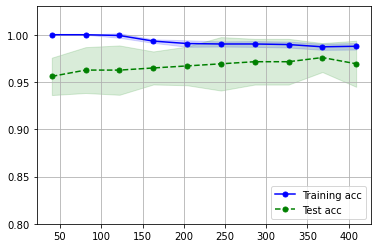

In [31]:
plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label  = 'Training acc')
plt.fill_between(train_sizes, train_mean+train_std, train_mean-train_std, alpha = .15, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', marker = 'o', markersize = 5, label  = 'Test acc', linestyle='--')
plt.fill_between(train_sizes, test_mean+test_std, test_mean-test_std, alpha = .15, color = 'green')

plt.legend(loc = 'lower right')
plt.grid()
plt.ylim([.8, 1.03])

C:\Users\soymi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\soymi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

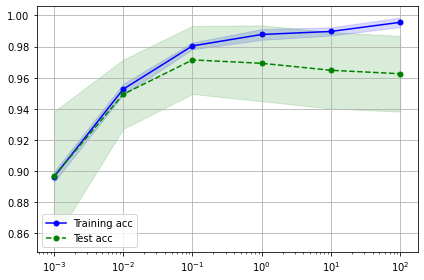

In [34]:
from sklearn.model_selection import validation_curve

param_range = [.001, .01, .1, 1., 10., 100.]

train_scores, test_scores = validation_curve(estimator = pipe_lr,
                                            X = X_train,
                                            y = y_train,
                                            param_name = 'logisticregression__C',
                                            param_range = param_range,
                                            cv = 10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label  = 'Training acc')
plt.fill_between(param_range, train_mean+train_std, train_mean-train_std, alpha = .15, color = 'blue')

plt.plot(param_range, test_mean, color = 'green', marker = 'o', markersize = 5, label  = 'Test acc', linestyle='--')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha = .15, color = 'green')
plt.xscale('log')
plt.grid()
plt.tight_layout()
plt.legend(loc = 'lower left')

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state = 42))
param_range = [np.power(10., x) for x in range(-4,4)]
param_grid = [{'svc__C' : param_range,
              'svc__kernel' : ['linear']},
              {'svc__C' : param_range,
              'svc__gamma' : param_range,
              'svc__kernel' : ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                 scoring = 'accuracy',
                 cv = 10,
                 refit = True,
                 n_jobs = -1)

gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0, 1000.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [43]:
gs.best_score_

0.9757004830917875

In [44]:
gs.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [45]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.01, random_state=42))])

In [48]:
clf.score(X_test, y_test)

0.956140350877193

In [50]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
confmat

array([[72,  0],
       [ 3, 39]], dtype=int64)

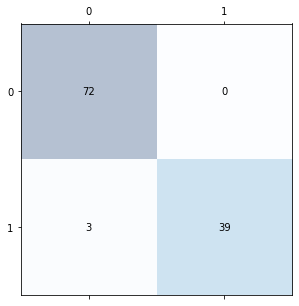

In [51]:
fig, ax = plt.subplots(figsize = (5,5))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = .3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j],
               va = 'center',
               ha = 'center')
        
        

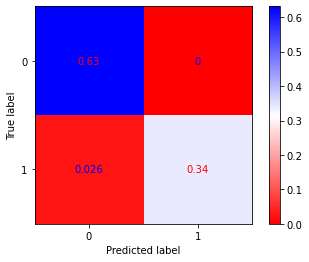

In [55]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipe_svc, X_test, y_test, cmap = plt.cm.bwr_r, normalize = 'all')

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print(precision_score(y_true=y_test, y_pred=y_pred))
print(recall_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred))

1.0
0.9285714285714286
0.962962962962963


In [60]:
from sklearn.metrics import make_scorer, f1_score

scorer = make_scorer(f1_score, pos_label = 0)

c_gamma_range = [np.power(10., x) for x in range(-2,2)]
param_grid = [{'svc__C' : c_gamma_range,
              'svc__kernel' : ['linear']},
             {'svc__C' : c_gamma_range,
             'svc__gamma' : c_gamma_range,
             'svc__kernel' : ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                 scoring = scorer,
                 cv = 10)

gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=42))]),
             param_grid=[{'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__gamma': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['rbf']}],
             scoring=make_scorer(f1_score, pos_label=0))

In [61]:
gs.best_score_

0.9778302131533996

In [63]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                       PCA(n_components=2),
                       LogisticRegression(penalty = 'l2', random_state=42, C=100.))

X_train2 = X_train[:, [4,14]]

cv = list(StratifiedKFold(n_splits=3, shuffle=True, random_state=42).split(X_train, y_train))

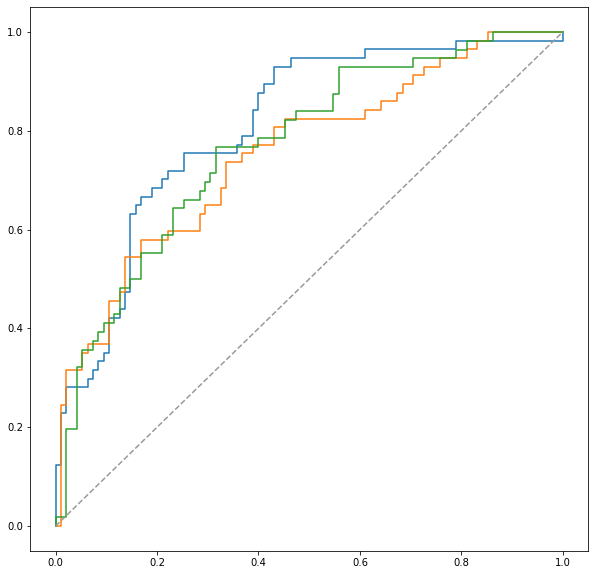

In [70]:
fig = plt.figure(figsize = (10, 10))

mean_tpr = 0.
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label = 1)
    
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label = 'ROC fold %d (area=%.2f)'%(i+1, roc_auc))
    
plt.plot([0,1], [0,1],
        linestyle = '--', color = (.6, .6, .6), label = 'random_guessing')

In [67]:
probas

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])